# ACF and Kurtosis

(from https://daim.idi.ntnu.no/masteroppgaver/004/4642/masteroppgave.pdf )

We'll show the autocorrelation function of log-rtn (rt) the autocorrelation function of rt^2. If rt is serially uncorrelated, 5% of the lags in the acf-plot is expected to fall outside the limits (the blue dotted lines). With 100 lags only 5 lags are expected to fall outside. We see that more than 5 lags fall outside for all the series, but the lags that fall outside does not make a pattern, i.e it is random which lag that fall outside, and most of the lags that fall outside are just barely outside the limits. Hence we can conclude that rt is approximately uncorrelated. But the lags that fall outside the limits in the acf of rt^2 do make a pattern. We see that the first lags are greatest, and then the acf decreases. Because the number of lags that fall outside is large and the lags that fall outside make a pattern, rt^2 is not uncorrelated. If rt is serially independent, rt^2 should be uncorrelated, but it is not, which means that rt is dependent. Hence a GARCH model is a good choice of modelling at, because rt is uncorrelated, but dependent. 

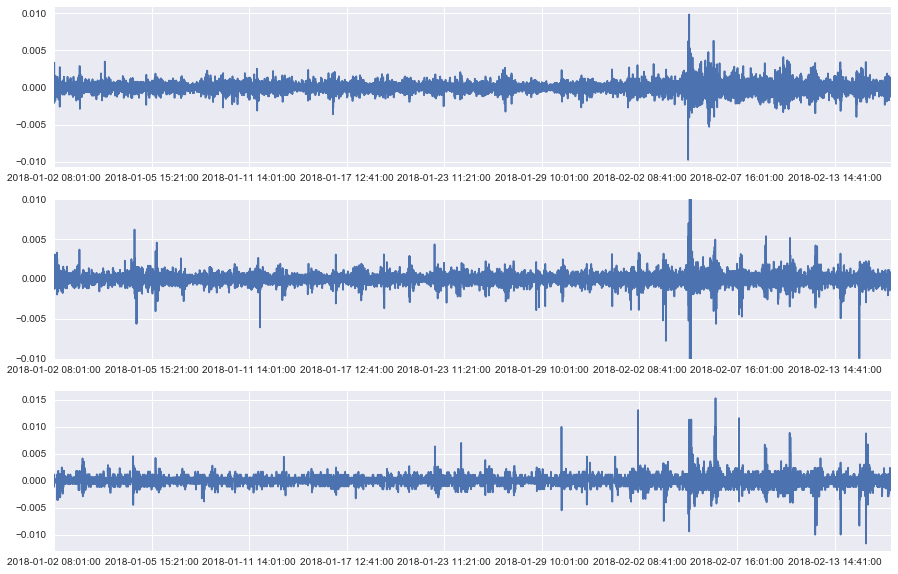

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# read the data
# data = pd.read_csv('closing_prices_cleaned.csv')
data = pd.read_csv('LogRtnCleaned', index_col=0)

plt.figure(figsize=(15,10))
plt.subplot(311)
data['BNP Paribas'].plot()
plt.subplot(312)
data['Bayer'].plot()
plt.ylim([-.01, .01])
plt.subplot(313)
data['Volkswagen'].plot()

In [53]:
dfBNP = data['BNP Paribas']
dfBYRN = data['Bayer']
dfVW = data['Volkswagen']

In [54]:
dfBNP2 = data['BNP Paribas']**2
dfBYRN2 = data['Bayer']**2
dfVW2 = data['Volkswagen']**2b

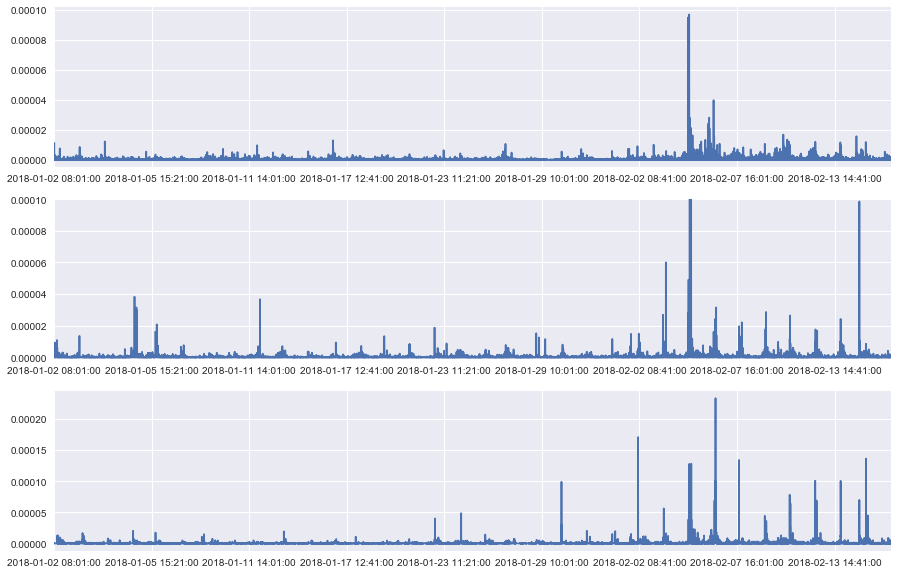

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(311)
dfBNP2.plot()
plt.subplot(312)
dfBYRN2.plot()
plt.ylim([-.000001, .0001])
plt.subplot(313)
dfVW2.plot()

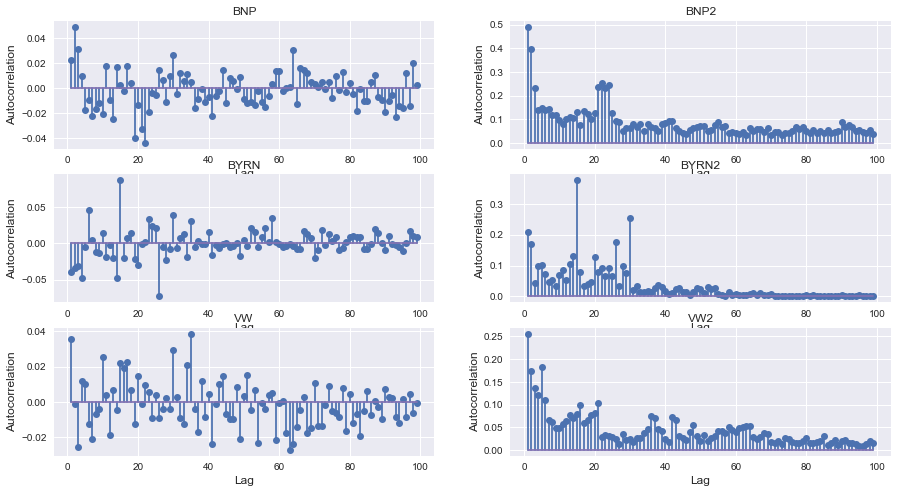

In [60]:
lags = range(1, 100)
acfBNP = [dfBNP.autocorr(lag=lag) 
          for lag in lags]
acfBNP2 = [dfBNP2.autocorr(lag=lag) 
          for lag in lags]
acfBYRN = [dfBYRN.autocorr(lag=lag) 
          for lag in lags]
acfBYRN2 = [dfBYRN2.autocorr(lag=lag) 
          for lag in lags]
acfVW = [dfVW.autocorr(lag=lag) 
          for lag in lags]
acfVW2 = [dfVW2.autocorr(lag=lag) 
          for lag in lags]

plt.figure(figsize=(15, 8))
plt.subplot(321)
plt.stem(lags, acfBNP)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('BNP')
plt.subplot(322)
plt.stem(lags, acfBNP2)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('BNP2')

plt.subplot(323)
plt.stem(lags, acfBYRN)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('BYRN')
plt.subplot(324)
plt.stem(lags, acfBYRN2)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('BYRN2')

plt.subplot(325)
plt.stem(lags, acfVW)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('VW')
plt.subplot(326)
plt.stem(lags, acfVW2)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.title('VW2')

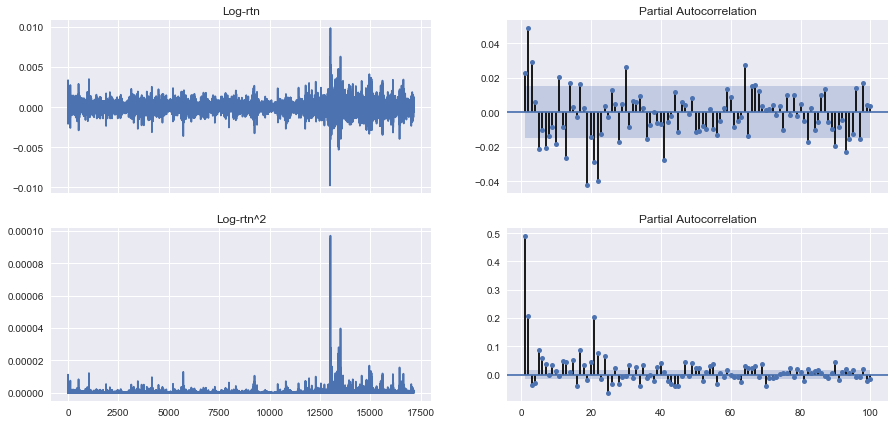

In [194]:
fig, (ax0, ax1) = plt.subplots(2, 2, sharex='col')
ax0[0].plot(range(len(dfBNP)), dfBNP)
ax0[0].set_title('Log-rtn')
ax1[0].plot(range(len(dfBNP)), dfBNP**2)
ax1[0].set_title('Log-rtn^2')

plot_acf(dfBNP, lags=100, zero=False, ax=ax0[1], use_vlines=True)
plot_acf(dfBNP**2, lags=100, zero=False, ax=ax1[1], use_vlines=True)
fig.set_figheight(7)
fig.set_figwidth(15)

## Kurtosis

The excess kurtosis of the European, American and Japanese at series are 8.15, 52.2 and
5.30 respectively. Since all excess kurtosis are greater than 0, the distribution of at has
heavy tails, which is a requirement for the GARCH models

In [205]:
stocks = [dfBNP, dfBYRN, dfVW]
for s in stocks:
    print('Kurtosis of {0} is: {1:.2f}'.format(s.name, s.kurtosis()))
#print("Point found: {0:.2f}, value: {1:.2f}".format(xs, fxs))

Kurtosis of BNP Paribas is: 20.11
Kurtosis of Bayer is: 147.84
Kurtosis of Volkswagen is: 38.63


In [35]:
#plt.figure(figsize=(15,5))
#plt.subplot()
#data.index = pd.to_datetime(data.index)
data5 = data.resample('3T', label='right', closed='right').sum()
#series.resample('3T', label='right', closed='right').sum()

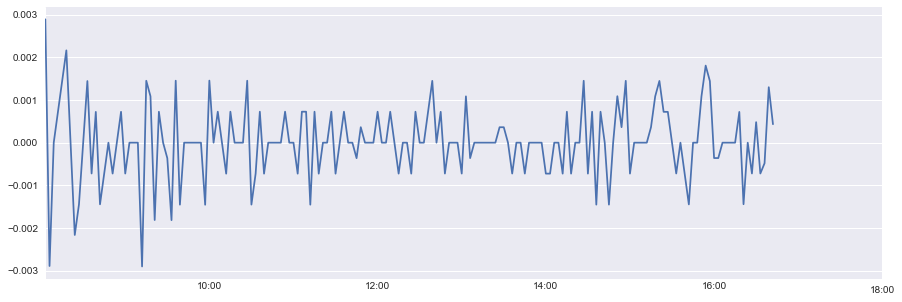

In [48]:
plt.figure(figsize=(15,5))
plt.subplot()
data5['ENI'][:200].plot()

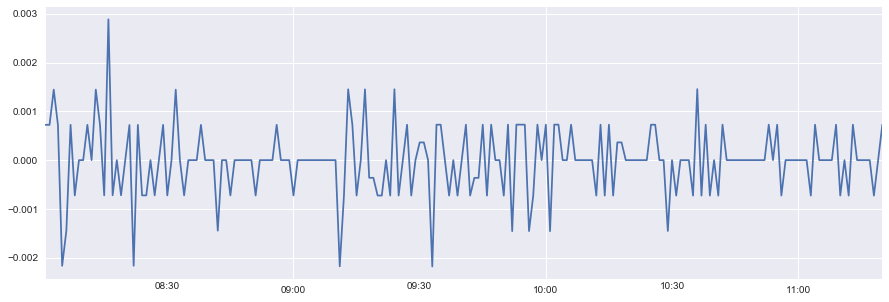

In [49]:
plt.figure(figsize=(15,5))
plt.subplot()
data['ENI'][:200].plot()

In [ ]:
## data['ENI'][:500]

In [11]:
data1 = pd.read_csv('data_renamed')

In [16]:
data1['ENI'][:500]

0      13.820
1      13.830
2      13.840
3      13.860
4      13.870
5      13.840
6      13.820
7      13.830
8      13.820
9      13.820
10     13.820
11     13.830
12     13.830
13     13.850
14     13.860
15     13.850
16     13.890
17     13.880
18     13.880
19     13.870
20     13.870
21     13.880
22     13.850
23     13.860
24     13.850
25     13.840
26     13.840
27     13.830
28     13.830
29     13.840
        ...  
470    13.820
471    13.825
472    13.830
473    13.830
474    13.850
475    13.870
476    13.870
477    13.870
478    13.870
479    13.870
480    13.865
481    13.860
482    13.860
483    13.860
484    13.860
485    13.860
486    13.860
487    13.860
488    13.860
489    13.860
490    13.860
491    13.860
492    13.860
493    13.860
494    13.880
495    13.860
496    13.870
497    13.870
498    13.870
499    13.870
Name: ENI, Length: 500, dtype: float64

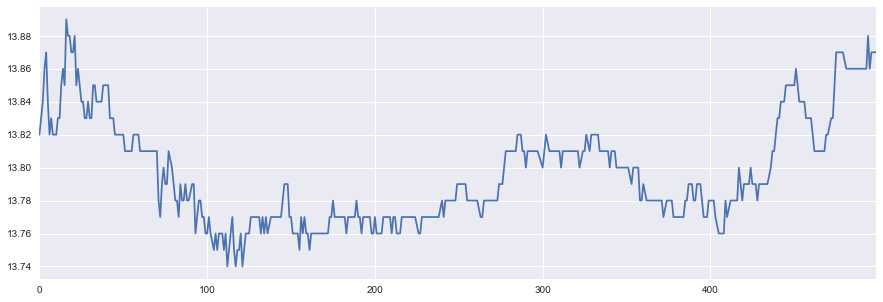

In [15]:
plt.figure(figsize=(15,5))

data1['ENI'][:500].plot()